<h2 align="center"> Univariate Linear Regression from Scratch </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)

In [4]:
data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Task 3: Visualize the Data
---

Text(0.5, 1.0, 'Profit in $10000s vs City Population in 10000s')

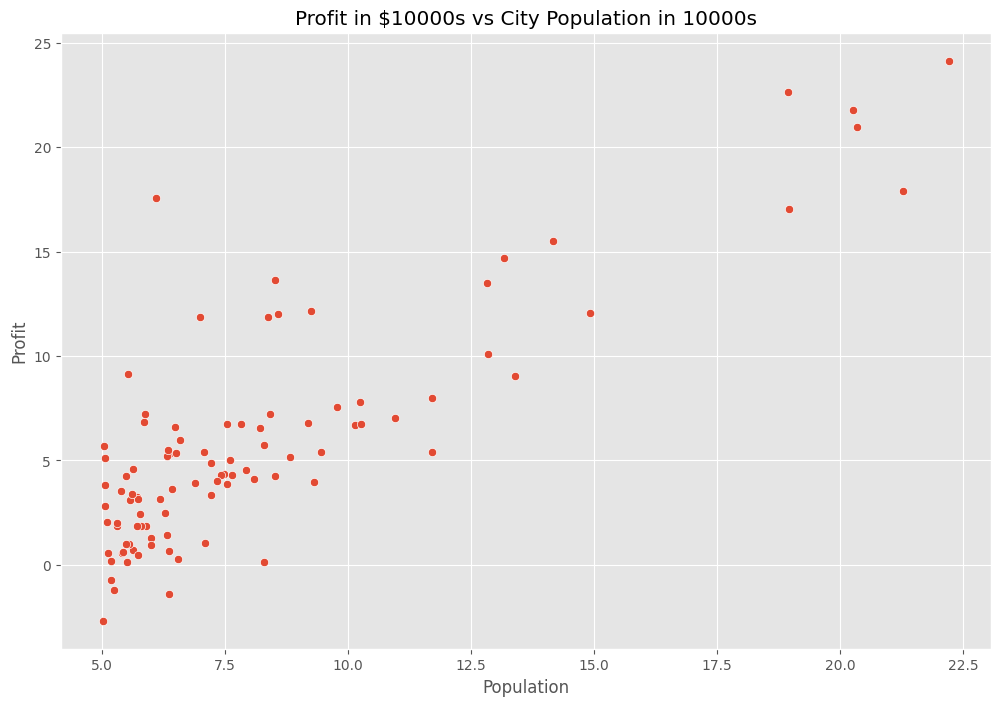

In [6]:
ax = sns.scatterplot(x='Population', y='Profit', data=data)
ax.set_title('Profit in $10000s vs City Population in 10000s')

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [7]:
# Implementing cost function from scratch

def cost_function(X, y, theta):
  m = len(y)
  y_pred = X.dot(theta)
  error = (y_pred - y) ** 2

  return 1 / (2 * m) * np.sum(error)

In [9]:
# Applying Cost Function to our data

m = data.Population.values.size
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis=1)
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2, 1))

In [10]:
cost_function(X, y, theta)

32.072733877455676

### Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [11]:
def gradient_descent(X, y, theta, alpha, iterations):
  m = len(y)
  costs = []

  for i in range(iterations):
    y_pred = X.dot(theta)
    error = np.dot(X.transpose(), (y_pred - y))
    theta -= alpha * (1 / m) * error
    costs.append(cost_function(X, y, theta))
  return theta, costs

### Gradient Descent for Linear Regression

The code above implements the gradient descent algorithm for linear regression:

1. The function `gradient_descent` takes the following parameters:
   - `X`: The input feature matrix (m x n) where m is the number of training examples and n is the number of features.
   - `y`: The target values or labels (m x 1) corresponding to the training examples.
   - `theta`: The parameter vector (n x 1) that represents the coefficients of the linear regression model.
   - `alpha`: The learning rate, which determines the step size at each iteration.
   - `iterations`: The number of iterations or steps to perform during gradient descent.

2. The variable `m` is initialized with the number of training examples, `len(y)`.

3. An empty list `costs` is created to store the cost function values at each iteration.

4. The loop `for i in range(iterations):` performs gradient descent for the specified number of iterations.

5. Inside the loop, the predicted values `y_pred` are computed by multiplying the input matrix `X` with the parameter vector `theta`.

6. The error term is calculated as the dot product of the transposed input matrix `X.transpose()` and the difference between the predicted values `y_pred` and the actual target values `y`.

7. The parameter vector `theta` is updated by subtracting the product of the learning rate `alpha`, the average of the error term `(1 / m) * error`, and the current parameter vector `theta`.

8. The cost function value is computed by calling a `cost_function` with arguments `X`, `y`, and `theta`, and the result is appended to the `costs` list.

9. After the loop finishes, the updated parameter vector `theta` and the list of cost function values `costs` are returned.

In [15]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=2000)

print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)),
                                 str(round(theta[1, 0], 2))))

h(x) = -3.89 + 1.19x1


### Task 6: Visualising the Cost Function $J(\theta)$
---

In [16]:
from mpl_toolkits.mplot3d import Axes3D

In [17]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

costs_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array([theta_0[i], theta_1[j]])
    costs_values[i, j] = cost_function(X, y, t)

Two arrays, `theta_0` and `theta_1`, are created using the `np.linspace()` function. `theta_0` contains 100 evenly spaced values ranging from -10 to 10, and `theta_1` contains 100 evenly spaced values ranging from -1 to 4. These arrays represent the different combinations of theta values for which the cost function will be evaluated.

1. An array `costs_values` is created using `np.zeros()` with the shape `(len(theta_0), len(theta_1))`. It is initialized with zeros to store the cost function values corresponding to each combination of theta values.

2. The nested loop `for i in range(len(theta_0)):` and `for j in range(len(theta_1)):` is used to iterate over each combination of `theta_0` and `theta_1` values.

3. Inside the nested loop, a temporary array `t` is created using `np.array()` to store the current combination of `theta_0` and `theta_1` values.

4. The cost function value for the current combination of `theta` values is computed by calling a `cost_function` with arguments `X`, `y`, and `t`. The result is then assigned to the corresponding element in the `costs_values` array using the indices `i` and `j`.

5. After both loops finish iterating over all combinations of `theta` values, the `costs_values` array will be populated with the computed cost function values.

This code is useful when visualizing the cost function in a two-dimensional space. By varying the `theta_0` and `theta_1` values, we can evaluate how the cost function changes across different parameter combinations. This information can be useful for tasks like visualizing the cost landscape or finding the optimal values for the parameters `theta`.

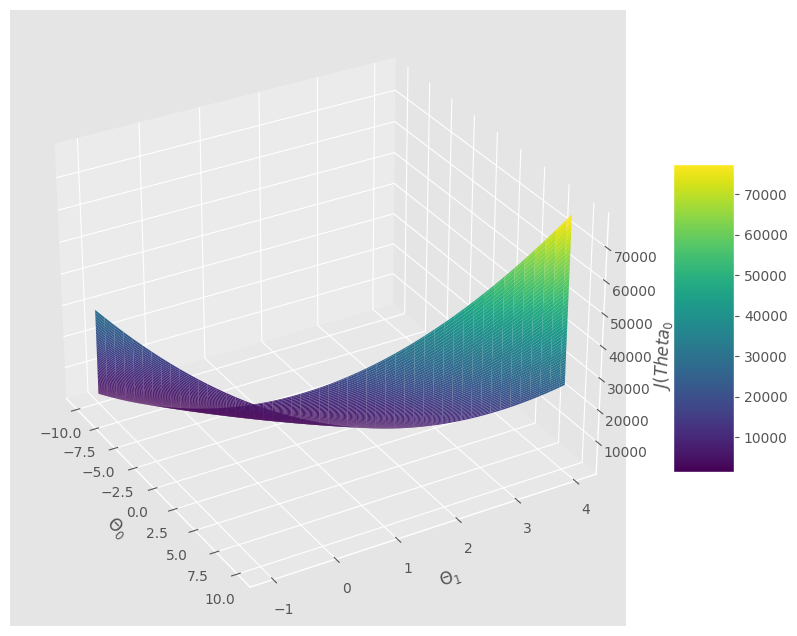

In [20]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, costs_values, cmap = 'viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(Theta_0$")
ax.view_init(30, 330)

plt.show()

### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'Values of the Cost Function over Iterations of Gradient Descent')

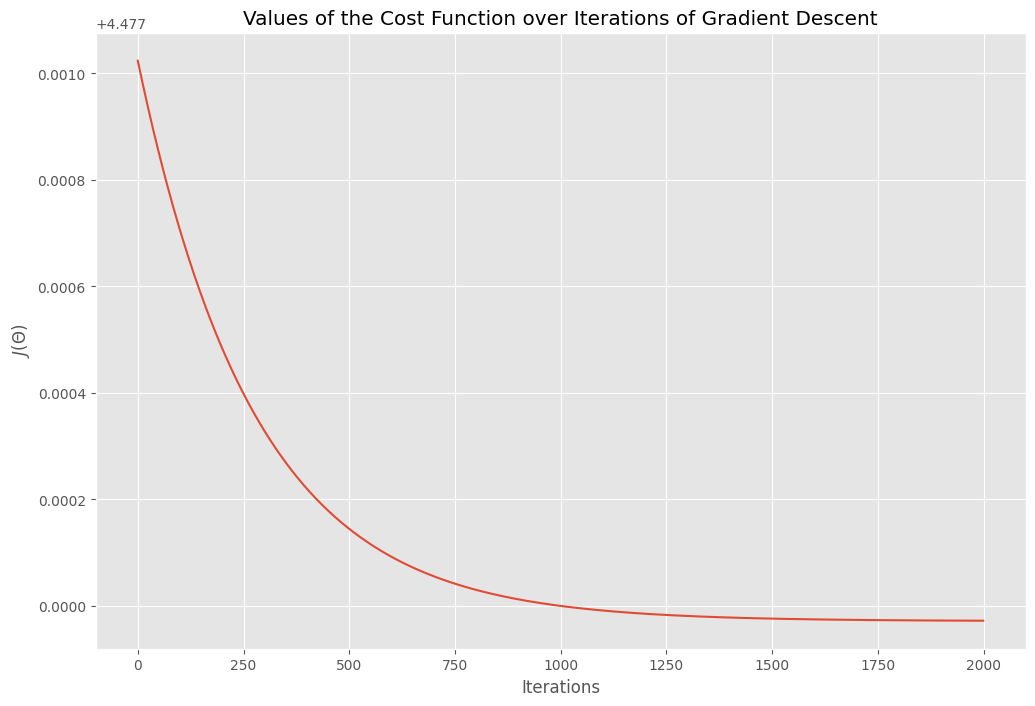

In [21]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost Function over Iterations of Gradient Descent")

### Task 8: Training Data with Linear Regression Fit
---

In [22]:
theta.shape

(2, 1)

In [23]:
theta

array([[-3.89286253],
       [ 1.19274046]])

In [24]:
theta = np.squeeze(theta)
theta

array([-3.89286253,  1.19274046])

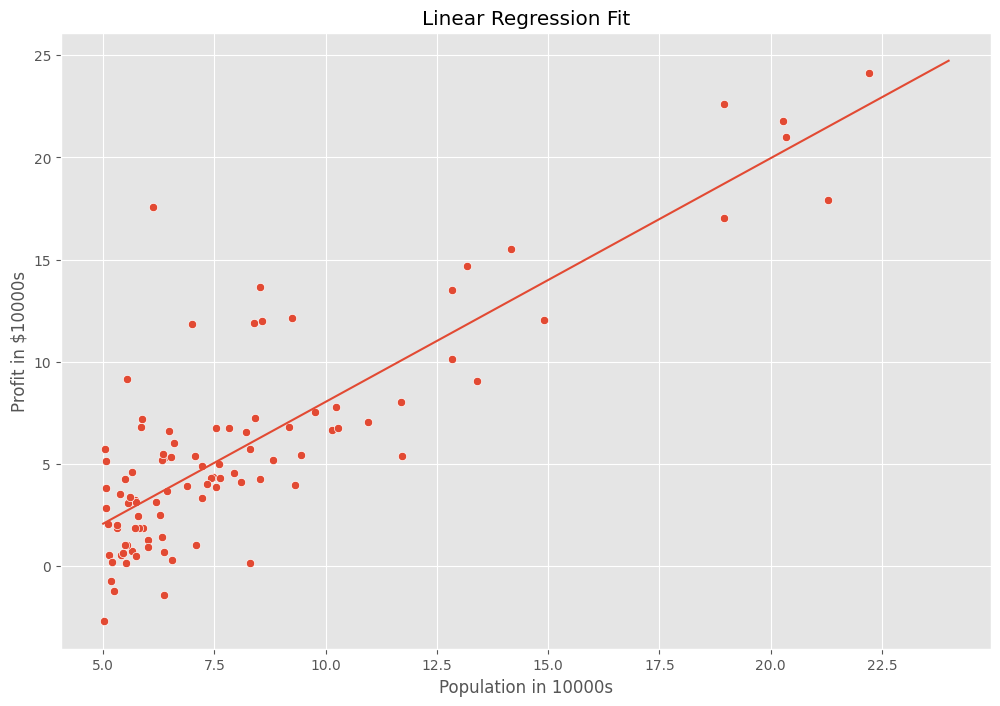

In [32]:
# Overlaying regression line to scatterplot

# Scatterplot
sns.scatterplot(x='Population', y='Profit', data=data)

# Regression Line
x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x=x_value, y=y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10000s")
plt.title("Linear Regression Fit");

This code generates a scatterplot using the Seaborn and overlays a regression line on the plot. The scatterplot is created using the 'Population' and 'Profit' columns from a dataset named data. The 'Population' column values are plotted on the x-axis, while the 'Profit' column values are plotted on the y-axis. The scatterplot is given a title of 'Profit in $10000s vs City Population in 10000s'.

To draw the regression line, the code defines two lists, x_value and y_value. The x_value list is created using a list comprehension, which generates a sequence of numbers ranging from 5 to 24 (inclusive). These numbers represent the x-values along the regression line.

The y_value list is also created using a list comprehension. For each x value in x_value, an expression x ^ theta[i] + theta[0] is evaluated to calculate the corresponding y-value for the regression line. However, it appears that there may be a typo in the code, as the caret operator (^) is typically used for bitwise XOR, which is likely not the intended operation here. It's possible that the multiplication operator (*) should be used instead.

Once the scatterplot and regression line data are defined, the scatterplot is displayed along with the overlay of the regression line. The accuracy of the regression line depends on the values assigned to theta and how well it fits the data. However, the code snippet provided does not show how the theta values are obtained or defined, making it unclear how accurate the regression line will be in this case.

### Task 9: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [33]:
# Making inferences outside our given data

def predict(x, theta):
  y_pred = np.dot(theta.transpose(), x)
  return y_pred

In [35]:
y_pred_1 = predict(np.array([1, 4]), theta) * 10000
print("For a population of 40,000 people the model predicts a profit of $" + str(round(y_pred_1, 0)))

For a population of 40,000 people the model predicts a profit of $8781.0


In [36]:
y_pred_2 = predict(np.array([1, 8.3]), theta) * 10000
print("For a population of 83,000 people the model predicts a profit of $" + str(round(y_pred_2, 0)))

For a population of 83,000 people the model predicts a profit of $60069.0
